## [ 산점도 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형)데이터에 사용함

In [73]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# [2] 데이터 준비
F_DATA=r'C:\Users\KDP15\Desktop\KDT6\EX_PANDAS06\DATA\auto_mpg.csv'

In [75]:
# [3] csv => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)

In [76]:
dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [77]:
dataDF.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [78]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [79]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2)

-0.83

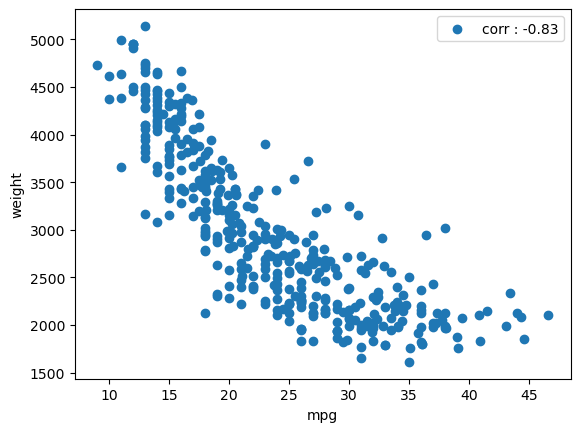

In [80]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg,dataDF.weight, label=f'corr : {round(corrSR["weight"],2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

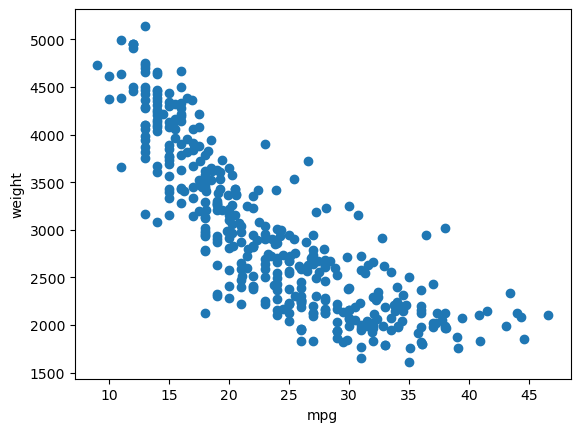

In [81]:
# - [4-2] 시각화 위랑 같다
plt.scatter(dataDF['mpg'],dataDF['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

In [82]:
dataDF.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [83]:
dataDF['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [84]:
dataDF.iloc[:,1]

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

In [85]:
len(dataDF.columns)

9

In [86]:
#  내가한것
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
# for i in range(len(dataDF.columns)):
#     plt.scatter(dataDF['mpg'],dataDF.iloc[:,i],)
#     plt.xlabel('mpg')
#     plt.legend()
#     plt.show()

In [87]:
corrSR.index[:4]

Index(['mpg', 'cylinders', 'displacement', 'weight'], dtype='object')

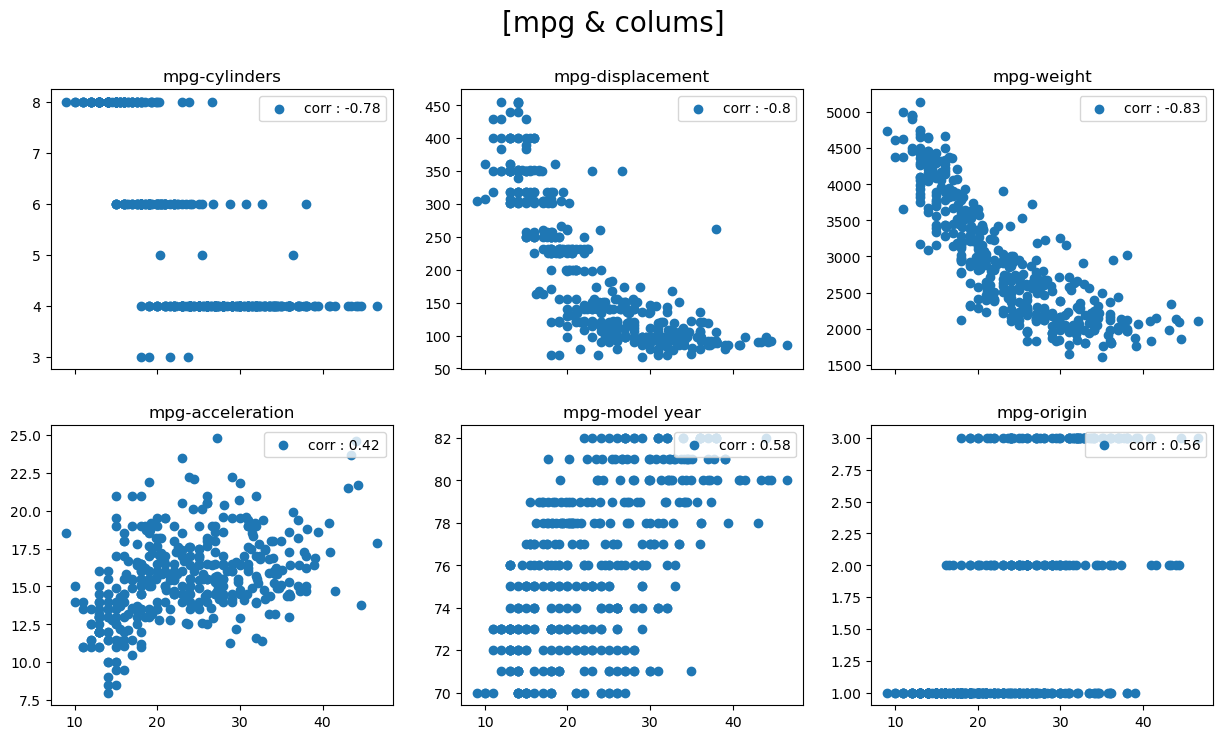

In [88]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(15,8))
# - (2) 그래프를 담을 공간 생성 axes
axs=fig.subplots(2,3, sharex=True)
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axs[row, col].scatter(dataDF['mpg'], dataDF[col_name], label=f'corr : {round(corrSR[col_name],2)}')
        axs[row, col].set_title(f'mpg-{col_name}')
        axs[row, col].legend(loc='upper right')
fig.suptitle("[mpg & colums]", fontsize=20)

plt.show()

- [5] 연비와 무게, 실런더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관관계가 높음
    * 연비와 실린더 개수도 반비례 관계

In [89]:
dataDF['cylinders']

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

In [90]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

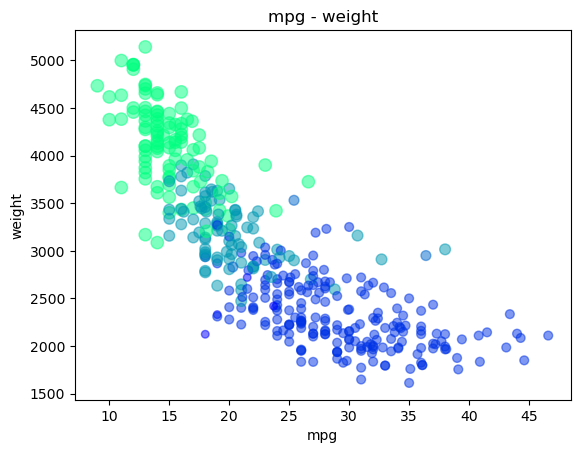

In [91]:
# - mpg와 weight 관계 산점도(scatter) 시각화
plt.scatter(dataDF['mpg'],dataDF['weight'], 
            s=dataDF['cylinders']*10, #s는 마커의 크기
            c=[dataDF['cylinders']],  #c는 마커의 색상
            alpha=0.5,                #alpha는 투명도
            cmap= 'winter'          #문자로 넣을수 있는 cmap
            )          
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('mpg - weight')
plt.show()

In [92]:
dataDF.corr(numeric_only=True)['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64